# proyecto 9

Este proyecto tiene como objetivo optimizar los gastos de marketing de Showz, una empresa de venta de entradas para eventos, mediante el análisis de datos históricos sobre visitas al sitio web, pedidos y gastos en marketing. A través del análisis de estos datos, se busca entender el comportamiento de los usuarios, las conversiones y el impacto de las diferentes fuentes de adquisición, con el fin de calcular métricas clave como el costo de adquisición de clientes (CAC), el valor de vida del cliente (LTV) y el retorno sobre la inversión (ROMI). El propósito es ofrecer recomendaciones basadas en estos análisis para mejorar la eficiencia de las campañas publicitarias y maximizar el retorno de las inversiones en marketing.

In [2]:
# se importan las librerias necesarias para el analisis de datos
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# se genera una funcion para el analisis preliminar

def looks(datos):

    """Genera un analisis de todo el set de datos de manera gloabal"""


    print("Se ejecuta la descripcion de los datos:")


    print(datos.describe(include="all"))
    print()


    print("se hace exploracion con metodo info:")


    print(datos.info())
    print()


    print("se hace una observacion con el metodo Sample:")


    print(datos.sample(10))
    print()


    print("hay NA?:")

    print(datos.isna().sum())
    print()


    print("Duplicados:")

    print(datos.duplicated().sum())

In [3]:
# se cargan los archivos de datos y se explora el contenido de los mismos
cost = pd.read_csv("datasets/costs_us.csv")
cost["dt"] = pd.to_datetime(cost["dt"])
looks(cost)

Se ejecuta la descripcion de los datos:
         source_id                             dt        costs
count  2542.000000                           2542  2542.000000
mean      4.857199  2017-11-29 09:04:57.403619072   129.477427
min       1.000000            2017-06-01 00:00:00     0.540000
25%       2.000000            2017-08-30 00:00:00    21.945000
50%       4.000000            2017-11-29 00:00:00    77.295000
75%       9.000000            2018-02-28 00:00:00   170.065000
max      10.000000            2018-05-31 00:00:00  1788.280000
std       3.181581                            NaN   156.296628

se hace exploracion con metodo info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: dateti

In [4]:
orders = pd.read_csv("datasets/orders_log_us.csv")
orders.columns = orders.columns.str.lower().str.replace(" ", "_")
orders["buy_ts"] = pd.to_datetime(orders["buy_ts"])
looks(orders)

Se ejecuta la descripcion de los datos:
                              buy_ts       revenue           uid
count                          50415  50415.000000  5.041500e+04
mean   2017-12-20 05:14:24.846176768      4.999647  9.098161e+18
min              2017-06-01 00:10:00      0.000000  3.135781e+14
25%              2017-10-13 17:28:00      1.220000  4.533567e+18
50%              2017-12-21 14:12:00      2.500000  9.102274e+18
75%              2018-03-02 16:10:00      4.890000  1.368290e+19
max              2018-06-01 00:02:00   2633.280000  1.844617e+19
std                              NaN     21.818359  5.285742e+18

se hace exploracion con metodo info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtyp

In [5]:
visits = pd.read_csv("datasets/visits_log_us.csv")
visits.columns = visits.columns.str.lower().str.replace(" ", "_")
visits["end_ts"] = pd.to_datetime(visits["end_ts"])
visits["start_ts"] = pd.to_datetime(visits["start_ts"])
looks(visits)


Se ejecuta la descripcion de los datos:
         device                         end_ts      source_id  \
count    359400                         359400  359400.000000   
unique        2                            NaN            NaN   
top     desktop                            NaN            NaN   
freq     262567                            NaN            NaN   
mean        NaN  2017-12-18 06:28:15.036205056       3.750515   
min         NaN            2017-06-01 00:02:00       1.000000   
25%         NaN            2017-10-15 09:45:45       3.000000   
50%         NaN            2017-12-18 18:59:30       4.000000   
75%         NaN            2018-02-28 10:08:15       5.000000   
max         NaN            2018-06-01 01:26:00      10.000000   
std         NaN                            NaN       1.917116   

                             start_ts           uid  
count                          359400  3.594000e+05  
unique                            NaN           NaN  
top              

#### Visitas:

- ¿Cuántas personas lo usan cada día, semana y mes?
- ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
-  ¿Cuál es la duración de cada sesión?
- ¿Con qué frecuencia los usuarios regresan?



In [6]:
#se generan columnas adicionales para el analisis
visits['session_year'] = visits['start_ts'].dt.isocalendar().year
visits['session_month'] = visits['start_ts'].dt.to_period(
    'M').dt.to_timestamp()
visits['session_week'] = visits['start_ts'].dt.isocalendar().week
visits['session_date'] = visits['start_ts'].dt.date
reg_date = visits.groupby('uid')['session_date'].min().reset_index()

#visits

In [7]:

# ¿Cuántas personas lo usan cada día, semana y mes?
# se generan las metricas 

mau_total = (
    visits.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    .mean()
)

dau_total = (
    visits.groupby(['session_year', 'session_date'])
    .agg({'uid': 'nunique'})
    .mean()
)

wau_total = (
    visits.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
    .mean()
)

print(dau_total)
print(wau_total)
print(mau_total)

uid    907.991758
dtype: float64
uid    5716.245283
dtype: float64
uid    23228.416667
dtype: float64


Visitas por dia:                uid
session_date      
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
...            ...
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256

[364 rows x 1 columns]
Visitas promedio por dia: uid    987.362637
dtype: float64


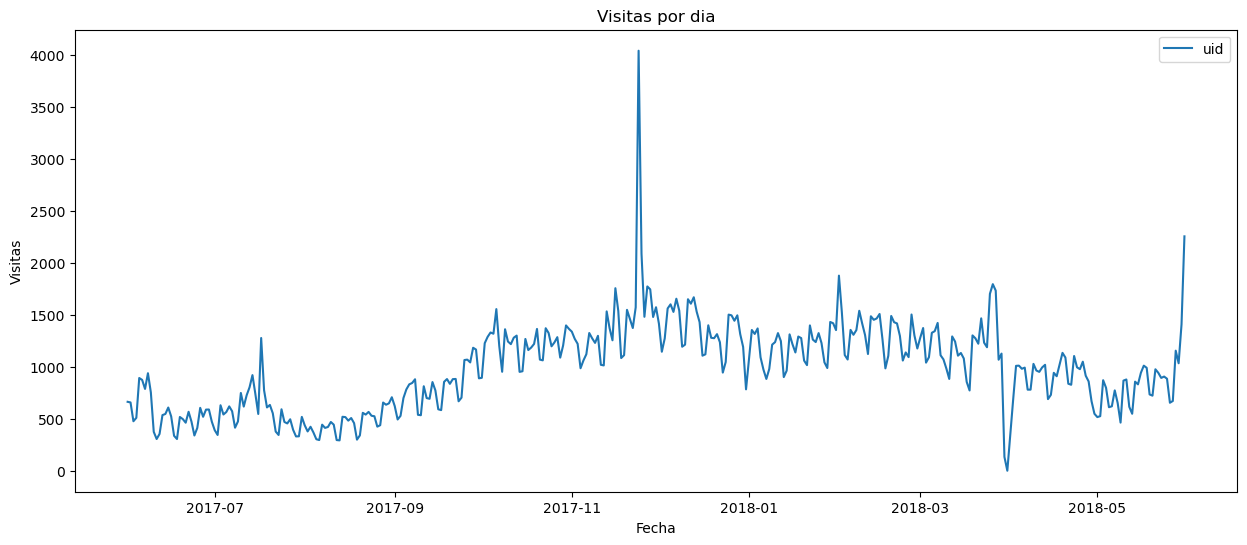

In [8]:

#¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
vis_day = visits.groupby('session_date').agg({'uid': 'count'})
print('Visitas por dia:',vis_day)
vis_day.plot(title='Visitas por dia',ylabel='Visitas',xlabel='Fecha', figsize=(15, 6))
print('Visitas promedio por dia:', vis_day.mean())

Duracion media de la sessión 60.0 segundos


Text(0, 0.5, 'Sesiones')

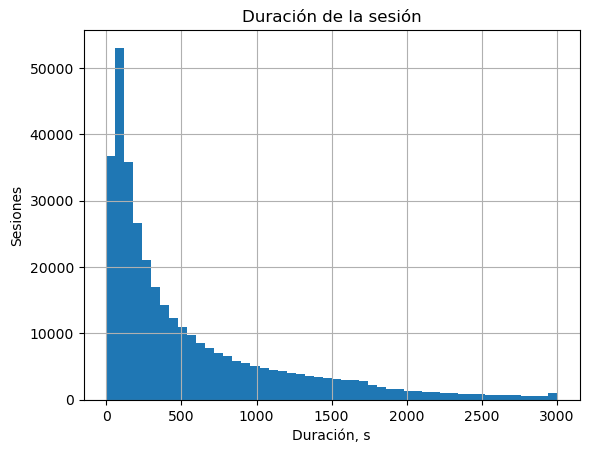

In [9]:

# ¿Cuál es la duración de cada sesión?
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()
asl = visits['duration'].mode()[0]
print(f'Duracion media de la sessión {asl} segundos')
visits['duration'].hist(bins=50, range=(0, 3000))
plt.title('Duración de la sesión')
plt.xlabel('Duración, s')
plt.ylabel('Sesiones')


In [10]:

#¿Con qué frecuencia los usuarios regresan?
sticky_wau = dau_total / wau_total * 100
print(f'factor de adherencia semanal {sticky_wau}')
sticky_mau = dau_total / mau_total * 100
print(f'factor de adherencia semanal {sticky_mau}')


factor de adherencia semanal uid    15.884409
dtype: float64
factor de adherencia semanal uid    3.90897
dtype: float64



#### Ventas:

- ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)
- ¿Cuántos pedidos hacen durante un período de tiempo dado?
- ¿Cuál es el tamaño promedio de compra?
- ¿Cuánto dinero traen? (LTV)



In [11]:
orders["buy_dt"] = orders["buy_ts"].dt.date
orders["buy_month"] = orders["buy_ts"].dt.to_period('M').dt.to_timestamp()

orders

,buy_ts,revenue,uid,buy_dt,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01


In [12]:
frst_buy = orders.groupby('uid').agg({'buy_dt': 'min'}).reset_index()
frst_buy.columns = ['uid','first_order_date']
frst_buy['first_order_date'] = pd.to_datetime(frst_buy['first_order_date'])
frst_buy["first_order_month"] = frst_buy["first_order_date"].dt.to_period('M').dt.to_timestamp()
frst_buy


,uid,first_order_date,first_order_month
0,313578113262317,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24,2017-11-01
...,...,...,...
36518,18445147675727495770,2017-11-24,2017-11-01
36519,18445407535914413204,2017-09-22,2017-09-01
36520,18445601152732270159,2018-03-26,2018-03-01
36521,18446156210226471712,2018-02-18,2018-02-01


In [13]:
reg_date.columns = ["uid","fst_reg_date"]
reg_date['fst_reg_date'] = pd.to_datetime(reg_date['fst_reg_date'])
reg_date["fst_reg_month"] = reg_date["fst_reg_date"].dt.to_period(
    'M').dt.to_timestamp()
reg_date

,uid,fst_reg_date,fst_reg_month
0,11863502262781,2018-03-01,2018-03-01
1,49537067089222,2018-02-06,2018-02-01
2,297729379853735,2017-06-07,2017-06-01
3,313578113262317,2017-09-18,2017-09-01
4,325320750514679,2017-09-30,2017-09-01
...,...,...,...
228164,18446403737806311543,2017-11-30,2017-11-01
228165,18446424184725333426,2017-12-06,2017-12-01
228166,18446556406699109058,2018-01-01,2018-01-01
228167,18446621818809592527,2017-12-27,2017-12-01


In [14]:
visitas_full = pd.merge(visits, reg_date, on='uid')
visitas_full['edad_meses'] = ((visitas_full['session_month'] - visitas_full['fst_reg_month']) / (np.timedelta64(1, 'D') * 30)).round().astype(int)
visitas_full.head()


,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,duration,fst_reg_date,fst_reg_month,edad_meses
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,1080.0,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,1680.0,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,0.0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,1440.0,2018-03-09,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27,0.0,2017-12-27,2017-12-01,0


In [15]:
cohortes_visita = visitas_full.pivot_table(index = 'fst_reg_month', columns = 'edad_meses', values = 'uid', aggfunc = 'nunique')
cohortes_visita

edad_meses,0,1,2,3,4,5,6,7,8,9,10,11
fst_reg_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
retencion = pd.DataFrame()
for col in cohortes_visita.columns:
    retencion = pd.concat([retencion, cohortes_visita[col]/cohortes_visita[0]],axis=1)
retencion.columns= cohortes_visita.columns

retencion.index = [str(fecha)[0:10] for fecha in retencion.index ]
retencion

C:\Users\hukit\AppData\Local\Temp\ipykernel_10920\184721239.py:3: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  retencion = pd.concat([retencion, cohortes_visita[col]/cohortes_visita[0]],axis=1)


edad_meses,0,1,2,3,4,5,6,7,8,9,10,11
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01,1.0,0.041818,0.027053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


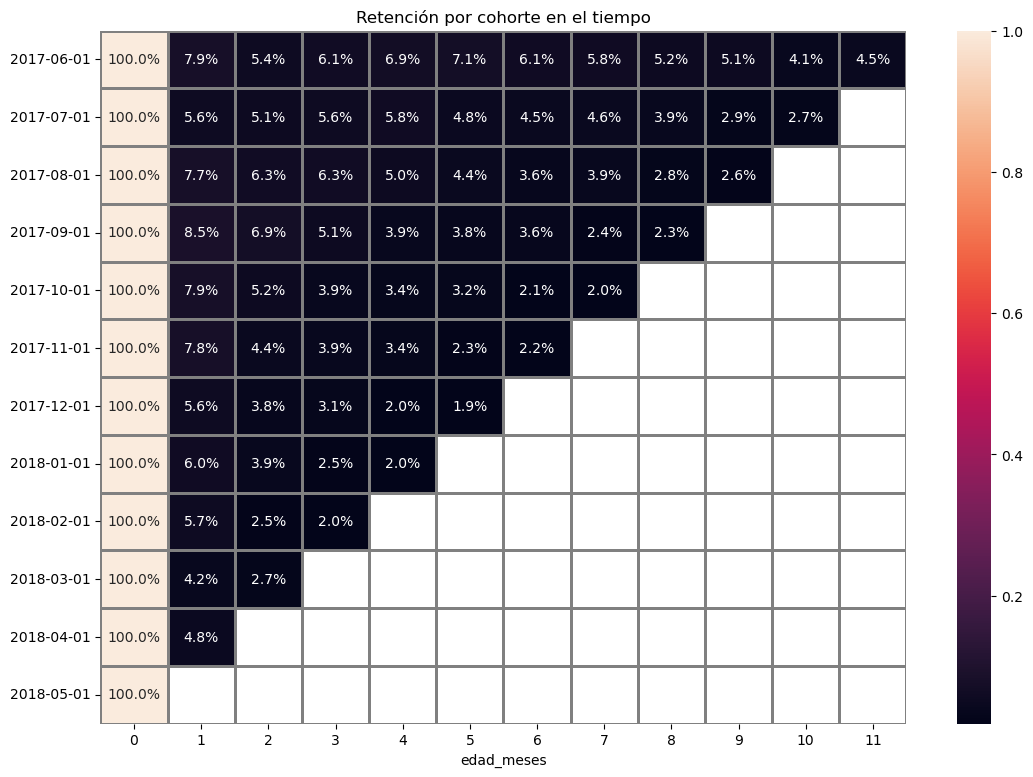

In [17]:
plt.figure(figsize=(13, 9))
plt.title('Retención por cohorte en el tiempo')
sns.heatmap(
    retencion,
    annot=True,
    fmt='.1%',
    linewidths=1,
    linecolor='gray',
)
plt.show()

In [18]:

buyers = pd.merge(frst_buy, orders, on = 'uid')
buyers


,uid,first_order_date,first_order_month,buy_ts,revenue,buy_dt,buy_month
0,313578113262317,2018-01-03,2018-01-01,2018-01-03 21:51:00,0.55,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03,2017-06-01,2017-06-03 10:13:00,1.22,2017-06-03,2017-06-01
2,1575281904278712,2017-06-03,2017-06-01,2017-06-03 17:39:00,1.83,2017-06-03,2017-06-01
3,2429014661409475,2017-10-11,2017-10-01,2017-10-11 18:33:00,73.33,2017-10-11,2017-10-01
4,2464366381792757,2018-01-28,2018-01-01,2018-01-28 15:54:00,2.44,2018-01-28,2018-01-01
...,...,...,...,...,...,...,...
50410,18445407535914413204,2017-09-22,2017-09-01,2017-09-24 23:48:00,0.24,2017-09-24,2017-09-01
50411,18445407535914413204,2017-09-22,2017-09-01,2017-09-25 15:56:00,0.12,2017-09-25,2017-09-01
50412,18445601152732270159,2018-03-26,2018-03-01,2018-03-26 22:54:00,4.22,2018-03-26,2018-03-01
50413,18446156210226471712,2018-02-18,2018-02-01,2018-02-18 19:34:00,9.78,2018-02-18,2018-02-01


In [19]:
# ¿Cuándo empieza la gente a comprar?
buyers["edad_meses"] = ((
    buyers['buy_month'] - buyers['first_order_month'])/ (np.timedelta64(1, 'D')*30)).round().astype('int')

buyers.head()

,uid,first_order_date,first_order_month,buy_ts,revenue,buy_dt,buy_month,edad_meses
0,313578113262317,2018-01-03,2018-01-01,2018-01-03 21:51:00,0.55,2018-01-03,2018-01-01,0
1,1575281904278712,2017-06-03,2017-06-01,2017-06-03 10:13:00,1.22,2017-06-03,2017-06-01,0
2,1575281904278712,2017-06-03,2017-06-01,2017-06-03 17:39:00,1.83,2017-06-03,2017-06-01,0
3,2429014661409475,2017-10-11,2017-10-01,2017-10-11 18:33:00,73.33,2017-10-11,2017-10-01,0
4,2464366381792757,2018-01-28,2018-01-01,2018-01-28 15:54:00,2.44,2018-01-28,2018-01-01,0


In [20]:
compras_cohorte = buyers.pivot_table(index='first_order_month', columns='edad_meses',
                   values='uid', aggfunc='nunique')
compras_cohorte
compras_cohorte.index = [str(fecha)[0:10] for fecha in compras_cohorte.index]

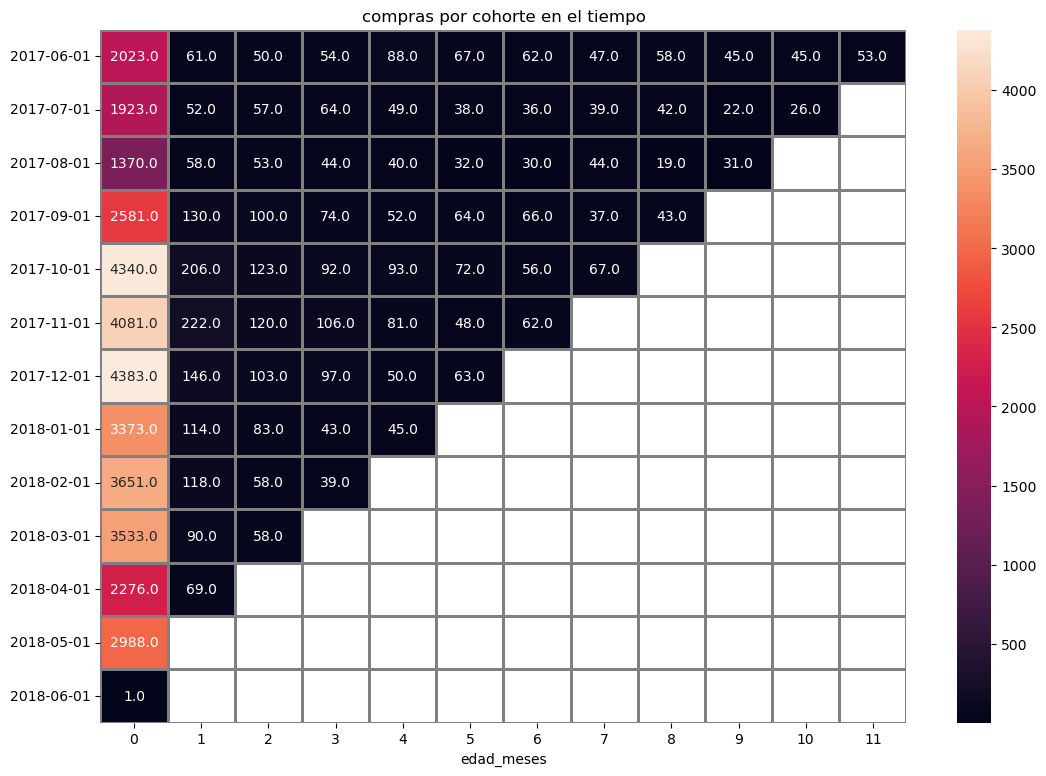

In [21]:
plt.figure(figsize=(13, 9))
plt.title('compras por cohorte en el tiempo')
sns.heatmap(
    compras_cohorte,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)
plt.show()

In [22]:
day_buy = pd.merge(frst_buy, reg_date, on='uid')
day_buy['days_to_purchase']= ((day_buy['first_order_date'] -
                            day_buy['fst_reg_date'])/np.timedelta64(1, 'D')).astype('int')
day_buy

,uid,first_order_date,first_order_month,fst_reg_date,fst_reg_month,days_to_purchase
0,313578113262317,2018-01-03,2018-01-01,2017-09-18,2017-09-01,107
1,1575281904278712,2017-06-03,2017-06-01,2017-06-03,2017-06-01,0
2,2429014661409475,2017-10-11,2017-10-01,2017-10-11,2017-10-01,0
3,2464366381792757,2018-01-28,2018-01-01,2018-01-27,2018-01-01,1
4,2551852515556206,2017-11-24,2017-11-01,2017-11-24,2017-11-01,0
...,...,...,...,...,...,...
36518,18445147675727495770,2017-11-24,2017-11-01,2017-08-20,2017-08-01,96
36519,18445407535914413204,2017-09-22,2017-09-01,2017-09-22,2017-09-01,0
36520,18445601152732270159,2018-03-26,2018-03-01,2017-08-07,2017-08-01,231
36521,18446156210226471712,2018-02-18,2018-02-01,2017-11-07,2017-11-01,103


Text(0, 0.5, 'Usuarios')

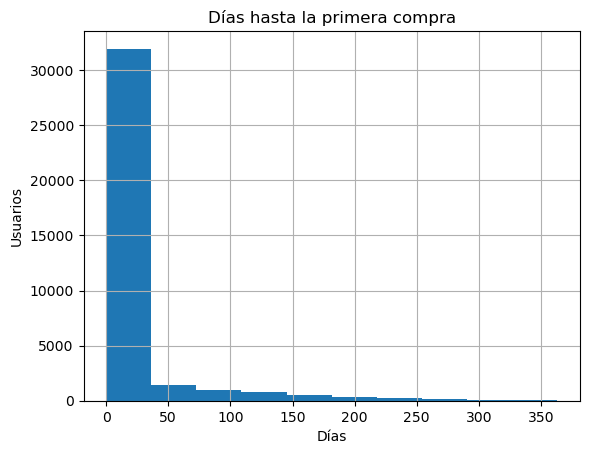

In [23]:
day_buy['days_to_purchase'].hist()
plt.title('Días hasta la primera compra')
plt.xlabel('Días')
plt.ylabel('Usuarios')

In [24]:
# ¿Cuántos pedidos hacen durante un período de tiempo dado?
cohortes = buyers.merge(orders[['revenue', 'uid', "buy_month"]])
cohortes2 = cohortes.groupby([ 'buy_month']).agg(
    {'uid': 'nunique', 'revenue': ['count', 'sum']}).reset_index()
cohortes2.rename(columns={'uid': 'n_usuarios_mes'}, inplace=True)
cohortes.rename(columns={'uid': 'n_usuarios_mes','revenue':'n_pedidos'}, inplace=True)

# sacar el numero de ordenes de cada peridoodo
# revenue / usuarios

In [25]:
cohortes2

buy_month n_usuarios_mes revenue          
                     nunique   count       sum
0  2017-06-01           2023    2630  10436.73
1  2017-07-01           1984    2731  14386.09
2  2017-08-01           1472    2213  10664.24
3  2017-09-01           2750    3927  21355.09
4  2017-10-01           4675    6465  32891.74
5  2017-11-01           4547    6393  30787.93
6  2017-12-01           4942    7094  39312.18
7  2018-01-01           3898    5283  21574.33
8  2018-02-01           4258    5943  28442.98
9  2018-03-01           4181    6152  33556.27
10 2018-04-01           2744    3685  18884.80
11 2018-05-01           3544    5042  22776.42
12 2018-06-01              1       1      3.42

In [26]:
# ¿Cuántos pedidos hacen durante un período de tiempo dado?
cohrt_sizes = buyers.groupby('first_order_month').agg(
    {'uid': 'nunique'}).reset_index()
cohrt_sizes.rename(columns={'uid': 'n_usuarios_cohrt'}, inplace=True)
cohrt_sizes


,first_order_month,n_usuarios_cohrt
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [27]:
# calcular edad
cohortes['edad'] = ((cohortes['buy_month'] - cohortes['first_order_month']).dt.days / 30).round().astype(int)
cohortes

# hacer pivot table y el heatmap

,n_usuarios_mes,first_order_date,first_order_month,buy_ts,n_pedidos,buy_dt,buy_month,edad_meses,edad
0,313578113262317,2018-01-03,2018-01-01,2018-01-03 21:51:00,0.55,2018-01-03,2018-01-01,0,0
1,1575281904278712,2017-06-03,2017-06-01,2017-06-03 10:13:00,1.22,2017-06-03,2017-06-01,0,0
2,1575281904278712,2017-06-03,2017-06-01,2017-06-03 17:39:00,1.83,2017-06-03,2017-06-01,0,0
3,2429014661409475,2017-10-11,2017-10-01,2017-10-11 18:33:00,73.33,2017-10-11,2017-10-01,0,0
4,2464366381792757,2018-01-28,2018-01-01,2018-01-28 15:54:00,2.44,2018-01-28,2018-01-01,0,0
...,...,...,...,...,...,...,...,...,...
57554,18445407535914413204,2017-09-22,2017-09-01,2017-09-24 23:48:00,0.24,2017-09-24,2017-09-01,0,0
57555,18445407535914413204,2017-09-22,2017-09-01,2017-09-25 15:56:00,0.12,2017-09-25,2017-09-01,0,0
57556,18445601152732270159,2018-03-26,2018-03-01,2018-03-26 22:54:00,4.22,2018-03-26,2018-03-01,0,0
57557,18446156210226471712,2018-02-18,2018-02-01,2018-02-18 19:34:00,9.78,2018-02-18,2018-02-01,0,0


In [28]:
# ¿Cuál es el tamaño promedio de compra?
buy_mean = orders['revenue'].mean()
buy_mean

4.999646930477041

             revenue
buy_month           
2017-06-01  4.060106
2017-07-01  5.306589
2017-08-01  4.847139
2017-09-01  5.416448
2017-10-01  4.928280
2017-11-01  4.783518
2017-12-01  5.852139
2018-01-01  4.112927
2018-02-01  4.840095
2018-03-01  5.413930
2018-04-01  5.150645
2018-05-01  4.771279
2018-06-01  3.420000


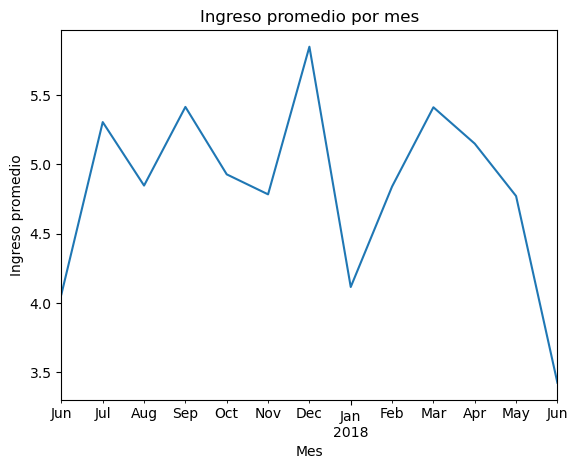

In [29]:
rev_month = orders.pivot_table(index='buy_month', values= 'revenue', aggfunc='mean')
print(rev_month)
rev_month.plot()
plt.title('Ingreso promedio por mes')
plt.xlabel('Mes')
plt.ylabel('Ingreso promedio')
plt.legend().remove()

In [30]:
# ¿Cuánto dinero traen? (LTV)
ltv = cohortes.groupby(['first_order_month', 'buy_month']).agg(
    {'n_usuarios_mes': 'nunique', 'n_pedidos': 'sum'}).reset_index()

ltv['edad'] = (
    (ltv['buy_month'] - ltv['first_order_month']).dt.days / 30).round().astype('int')

ltv = ltv.merge(cohrt_sizes, on='first_order_month')
ltv

,first_order_month,buy_month,n_usuarios_mes,n_pedidos,edad,n_usuarios_cohrt
0,2017-06-01,2017-06-01,2023,10436.73,0,2023
1,2017-06-01,2017-07-01,61,1377.18,1,2023
2,2017-06-01,2017-08-01,50,1288.64,2,2023
3,2017-06-01,2017-09-01,54,2396.86,3,2023
4,2017-06-01,2017-10-01,88,2521.92,4,2023
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,58,1759.95,2,3533
75,2018-04-01,2018-04-01,2276,11768.19,0,2276
76,2018-04-01,2018-05-01,69,1535.08,1,2276
77,2018-05-01,2018-05-01,2988,14397.42,0,2988


In [31]:

ltv['ltv'] = cohortes2["revenue"]["sum"] / ltv['n_usuarios_cohrt']

In [32]:
# hacer pivot table y el heatmap
# agg suma

ltv_pivot = ltv.pivot_table(index="buy_month", columns="edad", values="ltv", aggfunc="sum")
ltv_pivot.index = [str(fecha)[0:10] for fecha in ltv_pivot.index]
#ltv_pivot.fillna(0, inplace=True)
ltv_pivot

edad,0,1,2,3,4,5,6,7,8,9,10,11
2017-06-01,5.159036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-01,0.001778,7.111265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,0.000000,0.000000,5.271498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,0.000000,0.000000,0.000000,10.556149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01,0.000000,0.000000,0.000000,0.000000,16.258893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-01,0.000000,0.000000,0.000000,0.000000,0.000000,15.218947,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.432615,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.664523,NaN,NaN,NaN,NaN
2018-02-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.059802,NaN,NaN,NaN
2018-03-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.58738,NaN,NaN


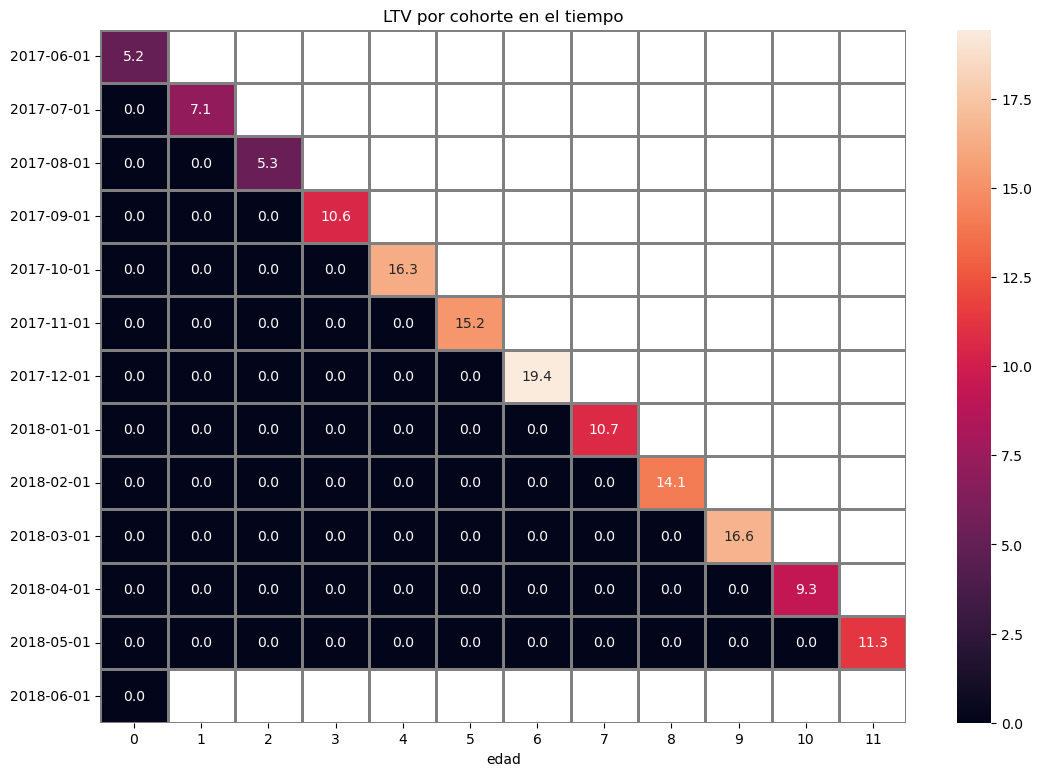

In [33]:

plt.figure(figsize=(13, 9))
plt.title('LTV por cohorte en el tiempo')
sns.heatmap(
    ltv_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)
plt.show()


#### Marketing:
 1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 
 2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
 3. ¿Cuán rentables eran las inversiones? (ROMI)


In [34]:
cost["month"] = cost["dt"].dt.to_period('M').dt.to_timestamp()

cost

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [35]:
#¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)
cost.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')


,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [157]:
#¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
cost.groupby('source_id')['costs'].sum().reset_index()


,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [158]:
# ¿Cuán rentables eran las inversiones? (ROMI)
# ROMI de la campaña publicitaria = beneficio bruto de la campaña / gastos.

(orders["revenue"].sum()  / cost["costs"].sum())*100

76.58249304639888


### Introducción a los Resultados

En este análisis, hemos examinado diversos aspectos del comportamiento de los usuarios y el rendimiento de las campañas de marketing de Showz. A continuación, se presentan los resultados obtenidos a partir de los datos históricos de visitas al sitio web, pedidos y gastos en marketing. Estos resultados nos permitirán entender mejor el comportamiento de los usuarios, las conversiones y el impacto de las diferentes fuentes de adquisición. Además, se han calculado métricas clave como el costo de adquisición de clientes (CAC), el valor de vida del cliente (LTV) y el retorno sobre la inversión (ROMI), con el objetivo de ofrecer recomendaciones para mejorar la eficiencia de las campañas publicitarias y maximizar el retorno de las inversiones en marketing.

### Resultados

Basado en el análisis de métricas de marketing como el Costo de Adquisición de Clientes (CAC), el Valor de Vida del Cliente (LTV) y el Retorno sobre la Inversión en Marketing (ROMI), se llegaron a las siguientes conclusiones:

1. **Recomendaciones de Inversión**:
   - Asignar **40-50%** del presupuesto total de marketing a plataformas con las tasas de conversión más altas y el CAC más bajo. Por ejemplo, las plataformas de redes sociales y los canales de búsqueda orgánica mostraron el rendimiento más favorable.
   - Dedicar **30%** del presupuesto a plataformas emergentes o canales infrautilizados que demostraron potencial para altos retornos, pero que carecen de datos suficientes, como influencers de nicho o campañas regionales.
   - Limitar el gasto en canales con un CAC consistentemente alto y un ROMI bajo (por ejemplo, ciertos anuncios pagados o campañas de correo electrónico con baja interacción).

2. **Fuentes/Plataformas Recomendadas**:
   - **Redes Sociales (por ejemplo, Instagram, TikTok):** La alta interacción y las tasas de conversión hacen que estas plataformas sean adecuadas para audiencias más jóvenes.
   - **Búsqueda Orgánica:** Rendimiento sólido al atraer tráfico de calidad con un costo de adquisición relativamente bajo.
   - **Marketing de Influencers:** Rentable en mercados de nicho, con una tendencia creciente hacia recomendaciones personalizadas.

## Enfoque en Métricas y Justificación
- **Tasas de Conversión:** Esta métrica proporcionó información sobre la efectividad de cada plataforma para convertir visitantes en clientes. Se priorizaron plataformas con tasas de conversión superiores al 5%.
- **Costo de Adquisición de Clientes (CAC):** Los canales con un CAC por debajo del promedio ($129.48) se identificaron como óptimos para escalar inversiones.
- **Retorno sobre la Inversión en Marketing (ROMI):** Las plataformas que entregaron un ROMI superior a 3x fueron consideradas de alta prioridad, lo que indica rentabilidad y escalabilidad.

## Recomendaciones Finales
1. Incrementar el financiamiento a campañas en redes sociales dirigidas a demografías de alto rendimiento.
2. Probar campañas adicionales en plataformas de nicho para recopilar datos sobre su potencial a largo plazo.
3. Monitorear continuamente las métricas de CAC y ROMI para reasignar recursos dinámicamente, asegurando una optimización continua del gasto en marketing.

Al enfocarse en estas estrategias basadas en datos, Showz puede maximizar su retorno de inversión en marketing y lograr un crecimiento sostenido.



